In [7]:
from keras.backend.tensorflow_backend import set_session
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model, np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf

# GPU sync failed problem solved.
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

In [8]:
dataset = pd.read_csv('../datasets/classification/iris.csv')
dataset.columns = [re.sub('[^a-zA-Z]*', '', column) for column in dataset.columns]
shuffle_dataset = shuffle(dataset)
shuffle_dataset

,sepallength,sepalwidth,petallength,petalwidth,class
123,6.3,2.7,4.9,1.8,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor


In [9]:
X = shuffle_dataset[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = shuffle_dataset[['class']]
y

,class
123,Iris-virginica
36,Iris-setosa
61,Iris-versicolor
145,Iris-virginica
148,Iris-virginica
14,Iris-setosa
101,Iris-virginica
149,Iris-virginica
69,Iris-versicolor
77,Iris-versicolor


In [10]:
encoder = LabelEncoder()
encoder.fit(np.ravel(y))
y = encoder.transform(y)
y = np_utils.to_categorical(y)
y

D:\Usuarios\cvazquezlos\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
INPUTS = X.shape[1]
OUTPUTS = y.shape[1]

n_hidden_structure = [4, 2] # Distribution of the neurons along the hidden layers.
epochs = 10 # Number of epochs of the training process of a neural network.
batch_size = 4 # Batch size is the subgroups that will be created from the training dataframe.
learning_rate = 0.01

model = Sequential()
model.add(Dense(n_hidden_structure[0], input_dim=INPUTS, activation='relu'))
for layer in n_hidden_structure[1:]:
    model.add(Dense(layer, activation='relu'))
model.add(Dense(OUTPUTS, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


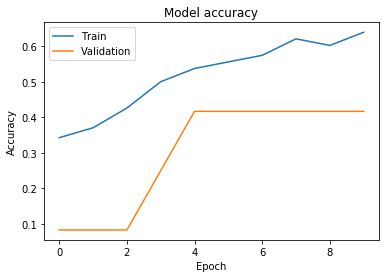

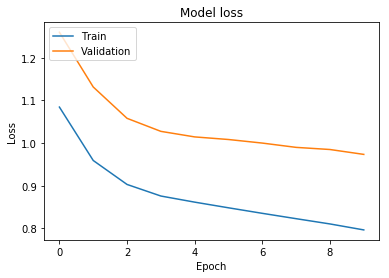

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plot_model(model)